In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The aim of this task is to analyse the effect of policyholder paying premium. We consider the following policy and want to see what happens in the policyholder stops premium payment. For students taking Life Insurance Mathematics the question will focus what this means re equivalence principle and how benefits accumulate over time and for students taking selected chapters the question centre both around ALM; risk minimising portfolios and bonus strategies. The details will be provided as per below.

**Product**

We consider a mixed endowment ($A_{x:n}$) for a man aged $x=80$, a contract length of $n=10$, a technical interest rate of $i_T = 2\%$ and a Benefit Level of $L = 100'000$ CHF.
The Mortality is given by
    # def Qx(gender,x,t,param =[]):
        # We don't use generational tables
        t=2020
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))

The premium has to be determined and is paid annually prenumerando

We have the insurance policy that is a mixed endowment
$$
Z  = \begin{cases}
L\cdot v^{K+1}& \text{if } K=0, 1, \dots, n-1 \\
L\cdot v^{n} & \text{if } K=n, n+1, \dots
\end{cases}
$$
funded by an annual prenumerando premium of $\Pi$ (i.e. a temporary annuity)
$$
Y = \sum_{k=0}^{n-1}1_{K\leq k}\cdot \Pi \cdot v^k = \Pi\cdot\sum_{k=0}^{n-1}1_{K\leq k}\cdot\cdot v^k
$$
where $\Pi$ is the premium that the insured person is going to pay.

Using the common actuarial notation (simply the notation used in the lecture) we have
\begin{align}
\mathbb{E}[Z] &= L\cdot A_{x:n}\\
\mathbb{E}[Y] &= \Pi\cdot ä_{x:n}
\end{align}

***(Answer to Q4)***

By the **equivalence principle** we must have $\mathbb{E}[Z-Y] = 0$, i.e.
$$
L\cdot A_{x:n} = \Pi\cdot ä_{x:n}
$$
The premium is therefore
$$
\Pi = L\cdot \frac{A_{x:n}}{ä_{x:n}}
$$

Hence, by equivalence principle the premium is

Using commutation functions, we have
$$
A_{x:n} = \frac{D_{x+n}+M_x-M_{x+n}}{D_x}
$$
and
$$
ä_{x:n} = \frac{N_x-N_{x+n}}{D_x}
$$
and consequently
$$
\Pi=\frac{D_{x+n}+M_x-M_{x+n}}{N_x-N_{x+n}}
$$

Let us now compute the reserve. We know that
$$
{}_kV_x = PV(\text{future benefits at time k})-PV(\text{future payments at time k})
$$
At time $k$, the PV of future benefits is a mixed endowment starting at age $x+k$ and ending at $x+n$, hence
$$
PV(\text{future benefits at time k}) = L\cdot \frac{D_{x+n}+M_{x+k}-M_{x+n}}{D_{x+k}}
$$
Similarly, the PV of future payments is a temporary annuity starting at age $x+k$ and ending at $x+n$, hence
$$
PV(\text{future payments at time k}) = \Pi\cdot\frac{N_{x+k}-N_{x+n}}{D_{x+k}}
$$
So the reserve is
\begin{align}
{}_kV_x &= L\cdot \frac{D_{x+n}+M_{x+k}-M_{x+n}}{D_{x+k}} - \Pi\frac{N_{x+k}-N_{x+n}}{D_{x+k}} \\
& = \frac{L\cdot(D_{x+n}+M_{x+k}-M_{x+n})-\Pi\cdot(N_{x+k}-N_{x+n})}{D_{x+k}}
\end{align}

Remark: for $k=0$ we get exactly the equivalence premium that we used to get the premium $\Pi$.

**Mechanism of stopping to pay premium**

A typical insurance policy allows the policyholder to top paying premium after having paid premium at every point in time. Hence in extremis the policyholder can only pay one premium over the whole policy term. In case a policyholder stops paying premium the policy is in the state ”Premium Free” and the future benefits will be reduced by means of actuarial principles: The mathematical reserve at this point in time is taken as a single premium resulting in lower benefits going forwards.

Let's assume that after $k$ years the customer stops the payment. Then we take the reserve ${}_kV_x$ as single premium to fund a new policy that is still a mixed endowment with a modified benefit level $\tilde{L^k}$, namely $Z$ has now expected value of $\tilde{L^k} \cdot A_{x+k:n-k}$ since the contract is valid between ages $x+k$ and $x+n$, so the length is $n-k$. The payments are then modelled with a single premium and the premium is $Y = {}_kV_x$.

Then we have
$$
\mathbb{E}[Z-Y] = \tilde{L^k} \cdot A_{x+k:n-k} - {}_kV_x \cdot 1
$$
By **equivalence principle** it must hold that $\mathbb{E}[Z-Y] = 0$
So we have
$$
\tilde{L^k} = \frac{{}_kV_x}{A_{x+k:n-k}}
$$
Using the formula from before we have
$$
{}_kV_x=\frac{L\cdot(D_{x+n}+M_{x+k}-M_{x+n})-\Pi\cdot(N_{x+k}-N_{x+n})}{D_{x+k}}
$$
and
$$
A_{x+k:n-k} = \frac{D_{x+n}+M_{x+k}-M_{x+n}}{D_{x+k}}
$$
and therefore
$$
\tilde{L^k} = \frac{L\cdot(D_{x+n}+M_{x+k}-M_{x+n})-\Pi\cdot(N_{x+k}-N_{x+n})}{D_{x+n}+M_{x+k}-M_{x+n}}
$$

**Computation of Premium(Method 1: Commutation functions)**

We first create the decrement table, construct the commutation functions and then compute the premium using the formula that we derived before.

In [2]:
# Define mortality table
def Qx(gender,x,t,param =[]):
        # We don't use generational tables
        t=2020
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))

# Create decrement table (copy-pasted from notebook from github)
lx = np.zeros(120)
dx = np.zeros(120)
lx[0] =100000
for i in range(110):
    lx[i+1] = lx[i] * (1 - Qx(0,i,2020))
    dx[i] = -lx[i+1] + lx[i]
    #print("%3d:  %8.1f  %7.1f"%(i, lx[i], dx[i]))

# Create commutation functions (copy-pasted from notebook from github)
iRate = 0.02
v = 1./(1+iRate)
#print(v)

Dx = np.zeros(110)
Cx = np.zeros(110)
Nx = np.zeros(110)
Mx = np.zeros(110)
Sx = np.zeros(110)
Rx = np.zeros(110)

for i in range(110):
    Dx[i] = lx[i] * v**i
    Cx[i] = dx[i] * v**(i+1)

for i in range(110):
    Nx[i] = sum(Dx[i:])
    Mx[i] = sum(Cx[i:])

#print("i, Dx[i], Cx[i], Nx[i], Mx[i], Sx[i],Rx[i]")

for i in range(110):
    Sx[i] = sum(Nx[i:])
    Rx[i] = sum(Mx[i:])
    #print("%3d:  %8.1f  %8.1f  %16.1f %16.1f %16.1f  %16.1f"%(i, Dx[i], Cx[i], Nx[i], Mx[i], Sx[i],Rx[i]))

In [3]:
x = 80
n = 10
L = 100000
Pi = L*(Dx[x+n]+Mx[x]-Mx[x+n])/(Nx[x]-Nx[x+n])
print("The premium is", round(Pi,2), "CHF")

The premium is 12302.98 CHF


**Computing the Mathematical Reserve**



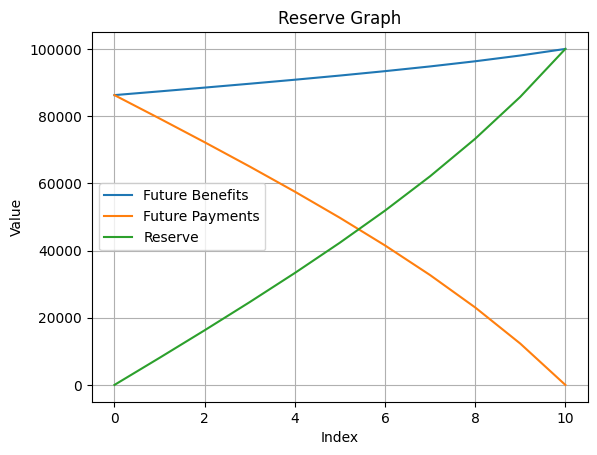

In [4]:
future_benefit = []
future_payment = []
reserve = []

for i in range(n+1):
  future_benefit.append(L*(Mx[x+i]-Mx[x+n]+Dx[x+n])/(Dx[x+i]))
  future_payment.append(Pi*(Nx[x+i]-Nx[x+n])/(Dx[x+i]))
  reserve.append(future_benefit[i]- future_payment[i])

# Plot the usual graph about the reserve
plt.plot(future_benefit, label='Future Benefits')
plt.plot(future_payment, label='Future Payments')
plt.plot(reserve, label='Reserve')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Reserve Graph')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [5]:
print("Reserve per year")
for i in range(10+1):
  print(i, round(reserve[i],2))

Reserve per year
0 0.0
1 8062.41
2 16260.21
3 24650.21
4 33308.28
5 42335.99
6 51870.01
7 62095.67
8 73266.94
9 85736.24
10 100000.0


**Answer to Question 2 and 3**

In [16]:
modified_benefit = []
modified_benefit_alternative = []
for s in range(n+1):
  A_xs_ns = (Mx[x+s]-Mx[x+n]+Dx[x+n])/(Dx[x+s])
  # formula with reserves
  modified_benefit.append((reserve[s])/(A_xs_ns))
  # direct formula with commutation functions
  modified_benefit_alternative.append((L*(Dx[x+n]+Mx[x+s]-Mx[x+n])-Pi*(Nx[x+s]-Nx[x+n]))/(Mx[x+s]-Mx[x+n]+Dx[x+n]))

print("Modified benefit level per year after stopping to pay premiums")
print(f"{'Year':<5} {'Benefit':>10}")
for i in range(10 + 1):
    print(f"{i:<5} {round(modified_benefit[i], 2):>10.2f}")

Modified benefit level per year after stopping to pay premiums
Year     Benefit
0           0.00
1        9228.77
2       18375.48
3       27498.51
4       36670.15
5       45980.83
6       55545.00
7       65509.06
8       76062.14
9       87450.96
10     100000.00


**Computation of Premium(Method 2: Importing Class DK)**

One needs to import the DK Class from the github notebook (didn't paste the code because it was relatively long. It's saved in Task2_using_DK.ipynb)

    # test = DK(QxNoReduction, "C")
      x  = 80
      x0=x
      sP = 90 # End of payment
      sL = sP # End of benefit
      gender = 0
      test.CalcPremium(gender,x,sL,sP)*100000
      x=[]
      y=[]
      for i in range(x0,max(sP,sL)):
        x.append(i)
        y.append(test.CalcPV(i)*100000)
      plt.figure(1)
      plt.plot(x,y)
      plt.grid(True)

We get the same result (one needs to multiply by 100) and the same graph.

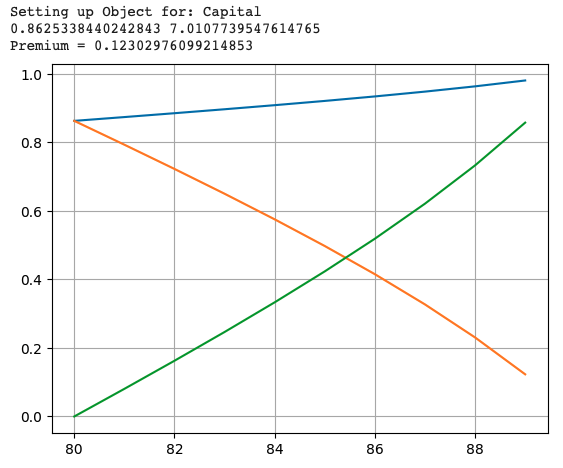

**Mechanism of stopping to pay premium**



------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
**USELESS STUFF**

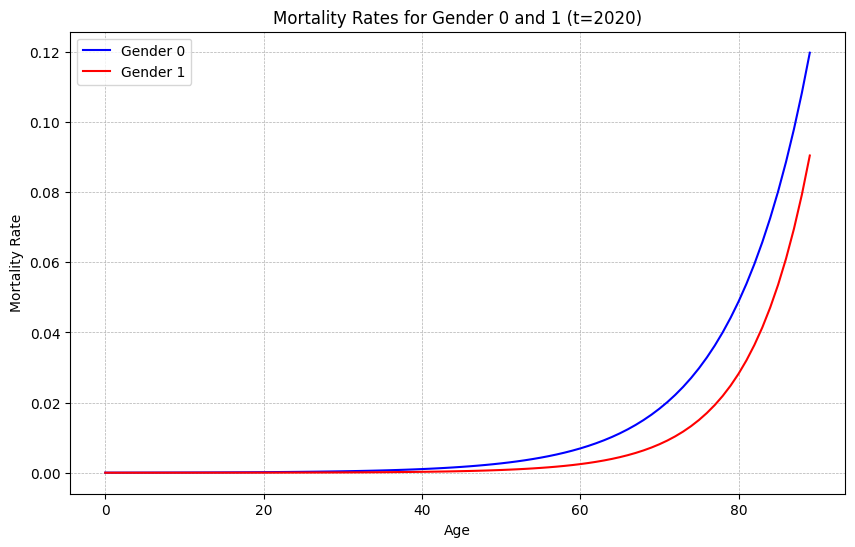

In [7]:
# Define age range
ages = np.arange(0, 90)

# Compute mortality for t=2020 for both genders across the age range
t = 2020
mortality_gender_0 = [Qx(0, age, t) for age in ages]
mortality_gender_1 = [Qx(1, age, t) for age in ages]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ages, mortality_gender_0, label="Gender 0", color="blue")
plt.plot(ages, mortality_gender_1, label="Gender 1", color="red")
#plt.yscale("log")  # Use a logarithmic scale for better visibility
plt.title("Mortality Rates for Gender 0 and 1 (t=2020)")
plt.xlabel("Age")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [8]:
import pandas as pd

# Create the table
data = {"i": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Adjust the range as needed
        "value": [np.round(reserve[x],2) for x in range(11)]}

# Convert to a DataFrame for a table format
table = pd.DataFrame(data)

# Display the table
print(table)

     i      value
0    0       0.00
1    1    8062.41
2    2   16260.21
3    3   24650.21
4    4   33308.28
5    5   42335.99
6    6   51870.01
7    7   62095.67
8    8   73266.94
9    9   85736.24
10  10  100000.00


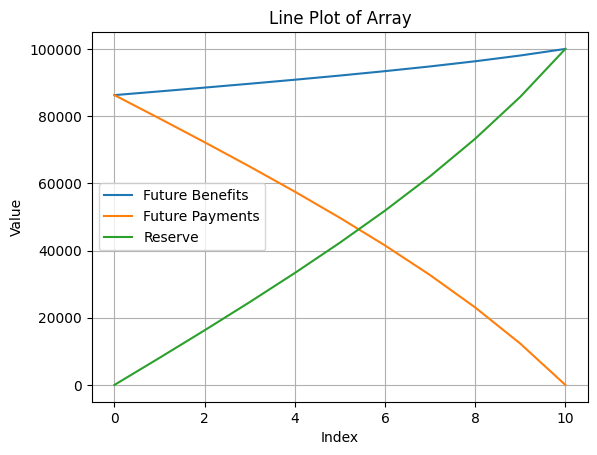

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the array
plt.plot(future_benefit, label='Future Benefits')
plt.plot(future_payment, label='Future Payments')
plt.plot(reserve, label='Reserve')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Array')
plt.legend()

# Show the plot
plt.grid()
plt.show()


In [10]:
modified_benefit = []
for s in range(n+1):
  A_xs_ns = (Mx[x+s]-Mx[x+n]+Dx[x+n])/(Dx[x+s])
  modified_benefit.append((reserve[s])/(A_xs_ns))
print(len(modified_benefit))
print(len(np.arange(60,81)))

11
21


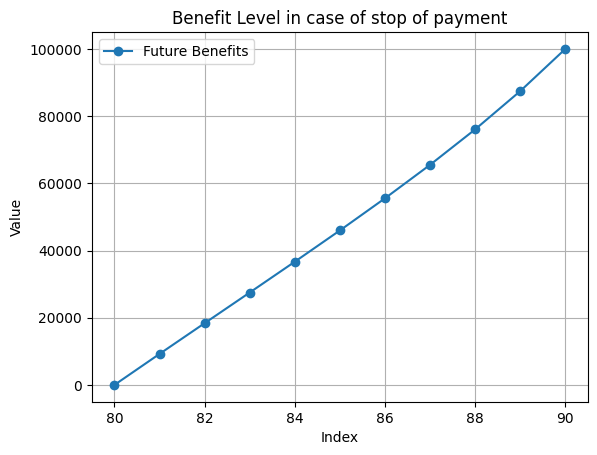

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 1D array
x_values = np.arange(x, x+n+1)
# Plot the array
plt.plot(x_values, modified_benefit, marker='o', label='Future Benefits')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Benefit Level in case of stop of payment')
plt.legend()

# Show the plot
plt.grid()
plt.show()


In [12]:


# Create the table
data = {"i": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Adjust the range as needed
        "value": [np.round(modified_benefit[x],2) for x in range(11)]}

# Convert to a DataFrame for a table format
table = pd.DataFrame(data)

# Display the table
print(table)

     i      value
0    0       0.00
1    1    9228.77
2    2   18375.48
3    3   27498.51
4    4   36670.15
5    5   45980.83
6    6   55545.00
7    7   65509.06
8    8   76062.14
9    9   87450.96
10  10  100000.00


In [13]:
print("The Benefit Level if the policyholder stops after one premium is ", round(modified_benefit[1],2), "CHF")

The Benefit Level if the policyholder stops after one premium is  9228.77 CHF
